In [2]:
#Importing all packages

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pprint
import seaborn as sns
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm

In [3]:
#Folder used including all files.
folder = os.getcwd()+'/Virus and Good Files/'

In [4]:
file_list = []

for file in os.listdir(folder):
    file_list.append(file)
#Creating a list with all files in the folder.

In [5]:
G_list = []
V_list = []

for f in file_list:
    if f[:1] == "G":
        G_list.append(f)
    if f[:1] == "V":
        V_list.append(f)
        
#Designating each file as good or virus based on the first letter.

In [6]:
lines = [] #An empty list that will be fed with all lines. 

#Creating a function to remove all triple quotes that throws off model accuracy.
def cleanQuotes(str_data):
    # Where your code starts:
    cleaned_data = ""
    delete_mode = False
    for i, char in enumerate(str_data):
        window = str_data[i : i+3] #Creates a three-index window that, with ''', will toggle the delete mode.
        if window == '"""':
            if delete_mode:
                delete_mode = False
            else:
                # Enter delete mode
                delete_mode = True
        if delete_mode:
            continue
        else:
            cleaned_data += char
    cleaned_data = cleaned_data.split("\n")
    final_data = ""

    for line in cleaned_data:
        if '"""' in line:
            continue
        else:
            final_data += line + "\n"
    return final_data

res = cleanQuotes(''.join(lines))

In [7]:
results = {} # A dictionary filled with results.
Classification = np.asarray([]) # Good vs. Bad files.
file_list_lines = [] # Stored filed content.

for file in file_list:
    lines = []
    try:
        with open(folder+file, "r", encoding = "utf-8") as f: # Opening the file.
            for line in f:
                if line[0] == '#':
                    line.replace(line, '\n')
                if line[0] == '\n\n':
                    line.replace(line, '\n')
                lines.append(line) # Storing the file's text..
            l = cleanQuotes("".join(lines))
            file_list_lines.append(l.split("\n"))
        if file[0][0] == "G":
            Classification = np.append(Classification, 0) # Not a virus
        else:
            Classification = np.append(Classification, 1) # Virus
    except:
        pass

In [8]:
file_list_strings = ['\n'.join(lines) for lines in file_list_lines] #Joining all strings.

In [9]:
df = pd.DataFrame(data=zip(file_list_strings,Classification), columns=['File', 'Classification'])

In [10]:
vectorizer = CountVectorizer() 
file_vectors = vectorizer.fit_transform(file_list_strings)
#Using a count vectorizer to gain a proper count.

In [11]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '0000000000000000000000000000000000000000',
 '00000000000000000000000000000000000000000000000000d',
 '00000000000000000000000000000000000000000000000000o',
 '000000000000000000000000000000000000000ko',
 '000000000000000000000000000000000okkkxdoodxokoooool',
 '0000000000000000000000000000oxdllc',
 '0000000000000000000000000x',
 '0000000000000000000oxl',
 '00000000000kdl',
 '00000000e',
 '0000000ol',
 '000000kdoc',
 '000000kl',
 '0000oo000000000000000000000000000000000000000kc',
 '0001032',
 '00015403',
 '00016886',
 '00019522',
 '00020308',
 '00020513',
 '00021792',
 '00023369',
 '00023428',
 '00024191',
 '0002546',
 '00025949',
 '00027514',
 '00027545',
 '00028829',
 '00028868',
 '0002998',
 '00030769',
 '00031221',
 '00031623',
 '00033805',
 '00034342',
 '00035004',
 '000355',
 '00036169',
 '00036514',
 '00038011',
 '00039282',
 '00040731',
 '00042144',
 '00042417',
 '00045688',
 '0005069',
 '0005164',
 '00053035',
 '00053228',
 '00053231',
 '000539

In [12]:
data = pd.DataFrame.sparse.from_spmatrix(file_vectors).sparse.to_dense() #Turns the vectors binary for counting.
data.columns = list(vectorizer.get_feature_names()) #A new df. All columns are unique words.
data.head()

,00,000,0000,000000,0000000000000000000000000000000000000000,00000000000000000000000000000000000000000000000000d,00000000000000000000000000000000000000000000000000o,000000000000000000000000000000000000000ko,000000000000000000000000000000000okkkxdoodxokoooool,0000000000000000000000000000oxdllc,...,zname,zone,zoom,zse,zsh,zte,ztmp,zu,zzz,čihař
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
binary_data = (data > 0) + 0 #Removing empty data.
binary_data['Classification'] = Classification
binary_data

,00,000,0000,000000,0000000000000000000000000000000000000000,00000000000000000000000000000000000000000000000000d,00000000000000000000000000000000000000000000000000o,000000000000000000000000000000000000000ko,000000000000000000000000000000000okkkxdoodxokoooool,0000000000000000000000000000oxdllc,...,zone,zoom,zse,zsh,zte,ztmp,zu,zzz,čihař,Classification
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [14]:
words_by_class = binary_data.groupby('Classification').sum().transpose()
words_by_class.columns=['Good', 'Virus']
#A new df where the instances of each word will be counted and differentiated between good and virus.

In [15]:
df['Classification'].value_counts()
n_virus = df['Classification'].value_counts()
n_virus = n_virus[1]

n_good = df['Classification'].value_counts()
n_good = n_good[0]

print(n_good,n_virus)

100 56


In [16]:
#Percentages exist to scale instances to the amount of files.
words_by_class['Good %'] = words_by_class['Good']/n_good
words_by_class['Virus %'] = words_by_class['Virus']/n_virus
words_by_class['Total'] = words_by_class['Good'] + words_by_class['Virus']
words_by_class['Difference %'] = words_by_class['Good %'] - words_by_class['Virus %']

In [17]:
#The Difference % is there to indicate which keywords are associated with which classification.
words_by_class.sort_values('Difference %')

,Good,Virus,Good %,Virus %,Total,Difference %
os,42,45,0.42,0.803571,87,-0.383571
while,20,28,0.20,0.500000,48,-0.300000
windows,5,17,0.05,0.303571,22,-0.253571
subprocess,5,17,0.05,0.303571,22,-0.253571
sleep,8,17,0.08,0.303571,25,-0.223571
...,...,...,...,...,...,...
dict,22,1,0.22,0.017857,23,0.202143
__name__,53,18,0.53,0.321429,71,0.208571
all,34,7,0.34,0.125000,41,0.215000
from,83,34,0.83,0.607143,117,0.222857


In [18]:
good_pd = words_by_class.sort_values('Difference %').tail(n=10)
good_kw = good_pd.index.values.tolist()

In [19]:
good_pd['Classification'] = 'Good'
good_pd

,Good,Virus,Good %,Virus %,Total,Difference %,Classification
len,45,16,0.45,0.285714,61,0.164286,Good
and,58,23,0.58,0.410714,81,0.169286,Good
return,66,27,0.66,0.482143,93,0.177857,Good
utils,20,1,0.20,0.017857,21,0.182143,Good
assert,19,0,0.19,0.000000,19,0.190000,Good
dict,22,1,0.22,0.017857,23,0.202143,Good
__name__,53,18,0.53,0.321429,71,0.208571,Good
all,34,7,0.34,0.125000,41,0.215000,Good
from,83,34,0.83,0.607143,117,0.222857,Good
none,57,19,0.57,0.339286,76,0.230714,Good


In [20]:
virus_pd = words_by_class.sort_values('Difference %').head(n=10)
virus_kw = virus_pd.index.values.tolist()
virus_pd['Classification'] = 'Virus'

In [21]:
virus_pd

,Good,Virus,Good %,Virus %,Total,Difference %,Classification
os,42,45,0.42,0.803571,87,-0.383571,Virus
while,20,28,0.20,0.500000,48,-0.300000,Virus
windows,5,17,0.05,0.303571,22,-0.253571,Virus
subprocess,5,17,0.05,0.303571,22,-0.253571,Virus
sleep,8,17,0.08,0.303571,25,-0.223571,Virus
py,15,20,0.15,0.357143,35,-0.207143,Virus
write,23,24,0.23,0.428571,47,-0.198571,Virus
time,23,24,0.23,0.428571,47,-0.198571,Virus
socket,2,12,0.02,0.214286,14,-0.194286,Virus
pass,20,22,0.20,0.392857,42,-0.192857,Virus


In [22]:
#Creating a new df to use for the graphic.
comb_df = pd.concat([virus_pd, good_pd])

<AxesSubplot:ylabel='Difference %'>

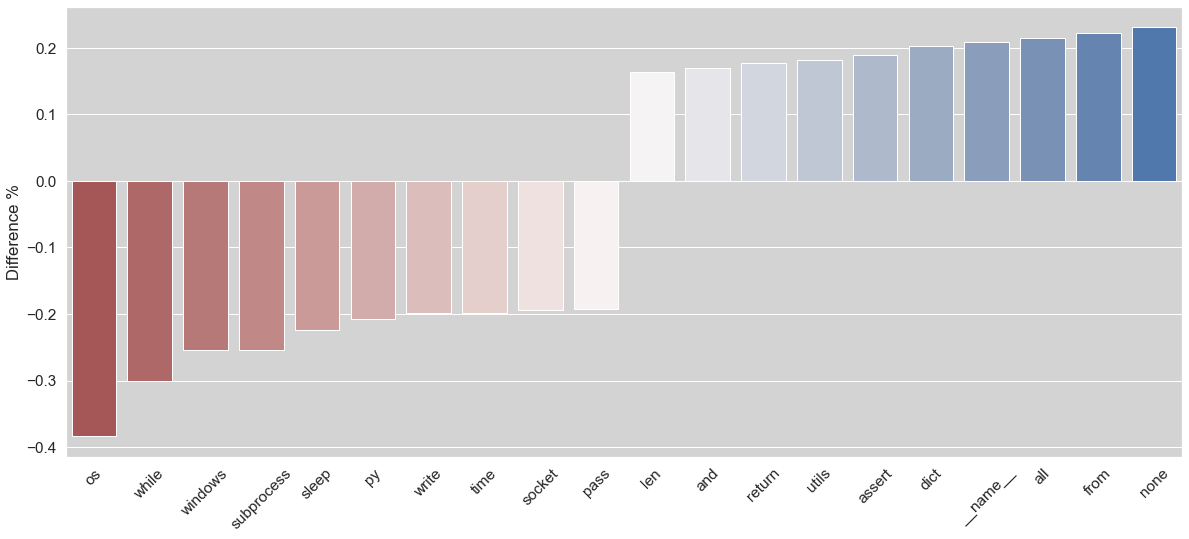

In [23]:
#This graphic displays the range of keyword associations to its corresponding classification.
sns.set(rc={'figure.figsize':(20,8.27), 'axes.facecolor': 'lightgrey'}, font_scale = 1.4)
plt.xticks(rotation=45)
sns.barplot(data=comb_df, x=comb_df.index, y='Difference %', palette='vlag_r')

In [24]:
#Logistic regression for good keywords
X = data[[x.lower() for x in good_kw if x in data.columns]]
sm_model = sm.Logit(df['Classification'], sm.add_constant(X)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

const       0.679029
len         0.143900
and         0.620192
return      0.238845
utils       0.120449
assert      0.999508
dict        0.338261
__name__    0.069978
all         0.400963
from        0.694296
none        0.982443
dtype: float64


C:\Users\Sarousi\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Sarousi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sarousi\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Classification   No. Observations:                  156
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                           10
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.2208
Time:                        23:22:26   Log-Likelihood:                -79.359
converged:                      False   LL-Null:                       -101.84
Covariance Type:            nonrobust   LLR p-value:                 2.208e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1066      0.258      0.414      0.679      -0.398       0.611
len            0.1365      0.093      1.461      0.144      -0.047       0.320
and            0.0613      0.124      0.496      0.620      -0.181       0.304
return        -0.0729      0.062     -1.178      0.239      -0.194       0.048
utils         -1.5163      0.976     -1.553      0.120      -3.430       0.397
assert       -22.6590   3.67e+04     -0.001      1.000    -7.2e+04     7.2e+04
dict          -0.1285      0.134     -0.958      0.338      -0.392       0.135
__name__      -0.7231      0.399     -1.812      0.070      -1.505       0.059
all           -0.2550      0.304     -0.840      0.401      -0.850       0.340
from           0.0218      0.055      0.393      0.694      -0.087       0.130
none           0.0013      0.061      0.022      0.982      -0.118       0.120
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [25]:
#Logistic regression for virus keywords.
X = data[[x.lower() for x in virus_kw if x in data.columns]]
sm_model = sm.Logit(df['Classification'], sm.add_constant(X)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

const         0.000004
os            0.503963
while         0.119227
windows       0.028155
subprocess    0.012563
sleep         0.072998
py            0.765152
write         0.394716
time          0.027856
socket        0.143981
pass          0.872328
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Classification   No. Observations:                  156
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                           10
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.2133
Time:                        23:22:26   Log-Likelihood:                -80.119
converged:                       True   LL-Null:                       -101.84
Covariance Type:            nonrobust   LLR p-value:                 4.144e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1256      0.244     -4.617      0.000      -1.603      -0.648
os            -0.0330      0.049     -0.668      0.504      -0.130       0.064
while          0.2547      0.163      1.558      0.119      -0.066       0.575
windows        0.8165      0.372      2.195      0.028       0.087       1.546
subprocess     0.6372      0.255      2.496      0.013       0.137       1.138
sleep          0.3008      0.168      1.793      0.073      -0.028       0.630
py             0.0271      0.091      0.299      0.765      -0.151       0.205
write          0.0565      0.066      0.851      0.395      -0.074       0.186
time          -0.3004      0.137     -2.199      0.028      -0.568      -0.033
socket         0.9688      0.663      1.461      0.144      -0.331       2.268
pass           0.0325      0.202      0.161      0.872      -0.363       0.428
==============================================================================
"""

In [26]:
#Creating a decision tree for further classification and model evaluation.

dec_tree = DecisionTreeClassifier(random_state=0)
cvs = list(cross_val_score(dec_tree, X, df['Classification'], cv=20))

def Average(cross_val_score_list): #A function to find the average of the list.
    return round(sum(cross_val_score_list) / len(cross_val_score_list),3)*100

Average(cvs)

76.5

In [27]:
#The antivirus function.

def AntiVirus(t_import_weight, b_word_weight, s_word_weight, threshold_weight, thresh, file_list_lines, classification, debug=False):
    file_string = ""
    classifications = classification
    output_list = np.asarray([])
    
    for file in file_list_lines:     
        threshold = thresh * threshold_weight
        total_imports = 0
        safe_words = 0
        bad_words = 0
        
        for line in file:
            # Import counts
            if "import" in line:
                total_imports += 1
            # Bad Lib checks
            
            # Safe Words
            for kw in good_kw:
                if kw.lower() in line.lower():
                    safe_words += 1
            # Bad Words
            for kw in virus_kw:
                if kw.lower() in line.lower():
                    bad_words += 1

        # For this file, calculate the total score:
        total = (total_imports * t_import_weight) + (bad_words * b_word_weight) - (safe_words * s_word_weight)

        if debug:
            print('''
            File: '''+ str(file[:10]))
            print("Length: ", len(file))
            print("Imports/BadWords/BadImports/SafeWords")
            print(total_imports, "/", bad_words, "/", safe_words)
            print("======== Total Score: " + str(round(total, 3)), "/", threshold)
            #print("Total marks: " + str(total_imports),str(bad_words),str(bad_imports),str(safe_words))

        if total > threshold:
            output_list = np.append(output_list, 1) # Virus
            if debug:
                print("++ Malware!")
        else:
            output_list = np.append(output_list, 0) # Not a virus
            if debug:
                print("-- Not Malware")
                
    a1 = classifications
    a2 = output_list
    count = np.count_nonzero(np.logical_not(np.logical_xor(a1, a2)))
    #A logical gate that flags mismatches between classification and how the function designates the file.
    
    return(round(count/len(file_list_lines),6) * 100)

AntiVirus(2, 7, 9, 1, 8, file_list_lines, Classification)

78.2051

In [28]:
results = {}
for i in range(1, 2):
    print(i)
    for j in range(1, 5):
        for k in range(1, 6):
            for l in range(1, 2):
                for m in range(1, 6):
                    results[(i, j, k, l, m)] = AntiVirus(i, j, k, l, m, file_list_lines, Classification)

1


In [29]:
pprint.pprint(sorted(results.items(), key=lambda x: x[1], reverse=True))

[((1, 4, 5, 1, 5), 80.1282),
 ((1, 3, 4, 1, 3), 77.5641),
 ((1, 3, 4, 1, 4), 77.5641),
 ((1, 4, 5, 1, 3), 77.5641),
 ((1, 4, 5, 1, 4), 77.5641),
 ((1, 2, 3, 1, 2), 76.9231),
 ((1, 2, 3, 1, 3), 76.9231),
 ((1, 2, 3, 1, 4), 76.9231),
 ((1, 3, 4, 1, 2), 76.9231),
 ((1, 3, 4, 1, 5), 76.9231),
 ((1, 4, 5, 1, 2), 76.9231),
 ((1, 1, 2, 1, 2), 75.641),
 ((1, 2, 2, 1, 5), 75.641),
 ((1, 2, 3, 1, 1), 75.641),
 ((1, 2, 3, 1, 5), 75.641),
 ((1, 3, 3, 1, 5), 75.641),
 ((1, 3, 4, 1, 1), 75.641),
 ((1, 3, 5, 1, 2), 75.641),
 ((1, 3, 5, 1, 4), 75.641),
 ((1, 4, 4, 1, 5), 75.641),
 ((1, 4, 5, 1, 1), 75.641),
 ((1, 2, 2, 1, 4), 75.0),
 ((1, 2, 4, 1, 3), 75.0),
 ((1, 3, 3, 1, 4), 75.0),
 ((1, 3, 5, 1, 1), 75.0),
 ((1, 3, 5, 1, 3), 75.0),
 ((1, 3, 5, 1, 5), 75.0),
 ((1, 4, 3, 1, 2), 75.0),
 ((1, 4, 3, 1, 3), 75.0),
 ((1, 4, 3, 1, 4), 75.0),
 ((1, 4, 3, 1, 5), 75.0),
 ((1, 1, 1, 1, 2), 74.359),
 ((1, 1, 1, 1, 3), 74.359),
 ((1, 1, 2, 1, 3), 74.359),
 ((1, 2, 2, 1, 3), 74.359),
 ((1, 2, 4, 1, 1), 74.359),
 